# Exercise 1a
## 1 Monta Carlo Simulation
### 1.1 Data Creation and Visualization

Say $\tilde{X}$ is uniformly distributed in $[0,1]$ and $F$ is a cumulative distribution function. According to inverse transform sampling
$$ X := F^{-1}(\tilde{X}) $$
with $F^{-1}(p):= \inf\{x \in \mathbb{R}| p\leq F(x)\}$ has the cumulative distribution function $F$.

The cumulative distribution functions of the likelihoods are given by
$$ F_{X,Y=0}(x) = \int_0^x P(X=x',Y=0) dx' = \int_0^x 2 - 2x' dx' = 2x - x^2 $$

$$ F_{X,Y=1}(x) = \int_0^x P(X=x',Y=1) dx' = \int_0^x 2x' dx' = x^2$$

Thus

$$F^{-1}_{X,Y=0}(p) = \inf \{x\in [0,1]|F_{X,Y=0}(x) \geq p \} \\
                 = \inf \{x\in [0,1]| 2x-x^2 \geq p\} = 1 - \sqrt{1-p}$$
                
$$F^{-1}_{X,Y=1}(p) = \inf \{x\in [0,1]|F_{X,Y=1}(x) \geq p \}\\
= \inf \{x\in [0,1]| x^2 \geq p\} = \sqrt{p}$$

In [1]:
#import libraries used for this exercise
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creates one instance of [X,Y]=[feature, response]
def create_instance():
    Y = np.random.randint(0,2)
    Xtilde = np.random.rand()
    if (Y==0):
        return np.array([1-np.sqrt(1-Xtilde), Y])
    else:
        return np.array([np.sqrt(Xtilde), Y])

#creates N instances of [X,Y]
def create_data(N):
    data = []
    for i in range(N):
        data.append(create_instance())
    return np.array(data)

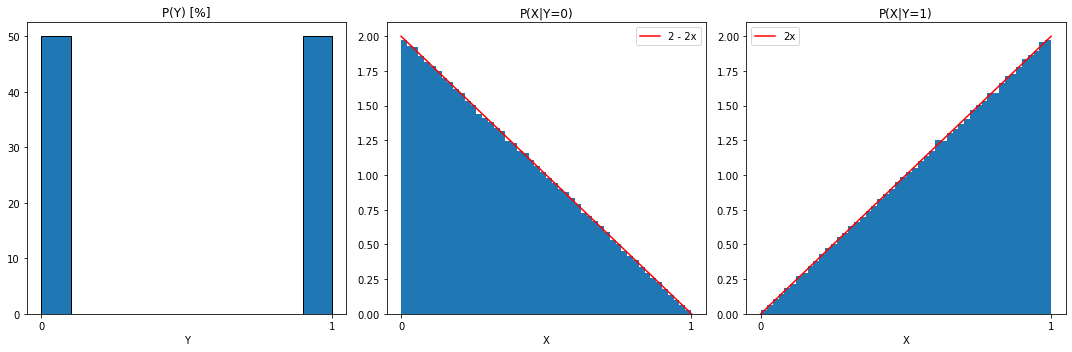

In [3]:
from matplotlib.ticker import PercentFormatter

#create a large number of instances
data = create_data(10**6).transpose()

#create histograms
fig, axes = plt.subplots(1, 3, tight_layout=True, figsize=(15,5))

axes[0].set_xticks([0,1])
axes[0].set_xlabel("Y")
axes[0].set_title("P(Y) [%]")
hist1 = axes[0].hist(data[1], weights=np.ones(len(data[1])) / len(data[1]) * 100, edgecolor="black")

axes[1].set_title("P(X|Y=0)")
axes[1].set_xticks([0,1])
axes[1].set_xlabel("X")
axes[1].plot([0,1], [2,0], color = "red", linewidth=1.5, label="2 - 2x")
axes[1].legend()
hist2 = axes[1].hist(data[0][data[1]==0], density=True, bins = 50)

axes[2].set_title("P(X|Y=1)")
axes[2].set_xticks([0,1])
axes[2].set_xlabel("X")
axes[2].plot([0,1], [0,2], color = "red", linewidth=1.5, label="2x")
axes[2].legend()
hist3 = axes[2].hist(data[0][data[1]==1], density=True, bins = 50)

### 1.2 Classification by Thresholding

In [4]:
#define classifiers
def create_classifier(xt, anti=False):
    if (anti):
        def anticlassifier(X):
            if (X<xt):
                return 1
            else:
                return 0
        return anticlassifier

    else:
        def classifier(X):
            if (X<xt):
                return 0
            else: 
                return 1
        return classifier

#computes error rate of a given classifier and n test sets of size M 
def compute_error_rates(Y, M, n=10):
    error_rates = np.array([]) #save the n error rates here
    for i in range(n):
        #create test data set
        data = create_data(M)
        
        #compute the error rate
        error_rate = 0
        for d in data:
            if (Y(d[0]) != d[1]):
                error_rate = error_rate + 1
        error_rate = error_rate/len(data)
        
        #save error rate
        error_rates = np.append(error_rates, error_rate)
    
    return error_rates


In [5]:
def test(M, xt):
    print("\nM="+str(M)+", xt="+str(xt)+":")

    cl = create_classifier(xt, anti=False)
    error_rates = compute_error_rates(cl, M)
    print("\nthreshold classifier:")
    print("mean:", np.round(np.mean(error_rates),3))
    print("std:", np.round(np.std(error_rates),4))

    acl = create_classifier(xt, anti=True)
    error_rates = compute_error_rates(acl, M)
    print("\nthreshold anti-classifier:")
    print("mean:", np.round(np.mean(error_rates),3))
    print("std:", np.round(np.std(error_rates),4))
    print("\n")

test(10, 0.2)
test(10, 0.5)
test(10, 0.6)

test(100, 0.2)
test(100, 0.5)
test(100, 0.6)

test(1000, 0.2)
test(1000, 0.5)
test(1000, 0.6)

test(10000, 0.2)
test(10000, 0.5)
test(10000, 0.6)


M=10, xt=0.2:

threshold classifier:
mean: 0.35
std: 0.1565

threshold anti-classifier:
mean: 0.66
std: 0.1356



M=10, xt=0.5:

threshold classifier:
mean: 0.24
std: 0.1855

threshold anti-classifier:
mean: 0.78
std: 0.1166



M=10, xt=0.6:

threshold classifier:
mean: 0.36
std: 0.1356

threshold anti-classifier:
mean: 0.74
std: 0.1356



M=100, xt=0.2:

threshold classifier:
mean: 0.32
std: 0.0303

threshold anti-classifier:
mean: 0.644
std: 0.0415



M=100, xt=0.5:

threshold classifier:
mean: 0.243
std: 0.0486

threshold anti-classifier:
mean: 0.754
std: 0.0287



M=100, xt=0.6:

threshold classifier:
mean: 0.245
std: 0.0367

threshold anti-classifier:
mean: 0.731
std: 0.0284



M=1000, xt=0.2:

threshold classifier:
mean: 0.34
std: 0.0153

threshold anti-classifier:
mean: 0.667
std: 0.0128



M=1000, xt=0.5:

threshold classifier:
mean: 0.259
std: 0.009

threshold anti-classifier:
mean: 0.743
std: 0.0129



M=1000, xt=0.6:

threshold classifier:
mean: 0.266
std: 0.015

threshold 

To check that the minimal overall error of 25% is achieved for $x_t$ = 0.5 in case of the threshold classifier we have to look at the result of a sufficiently large test set. We can clearly see from the example above that indeed this error is achieved for M=10000. The next step is to find out how the std of the error rate evolves with M. 

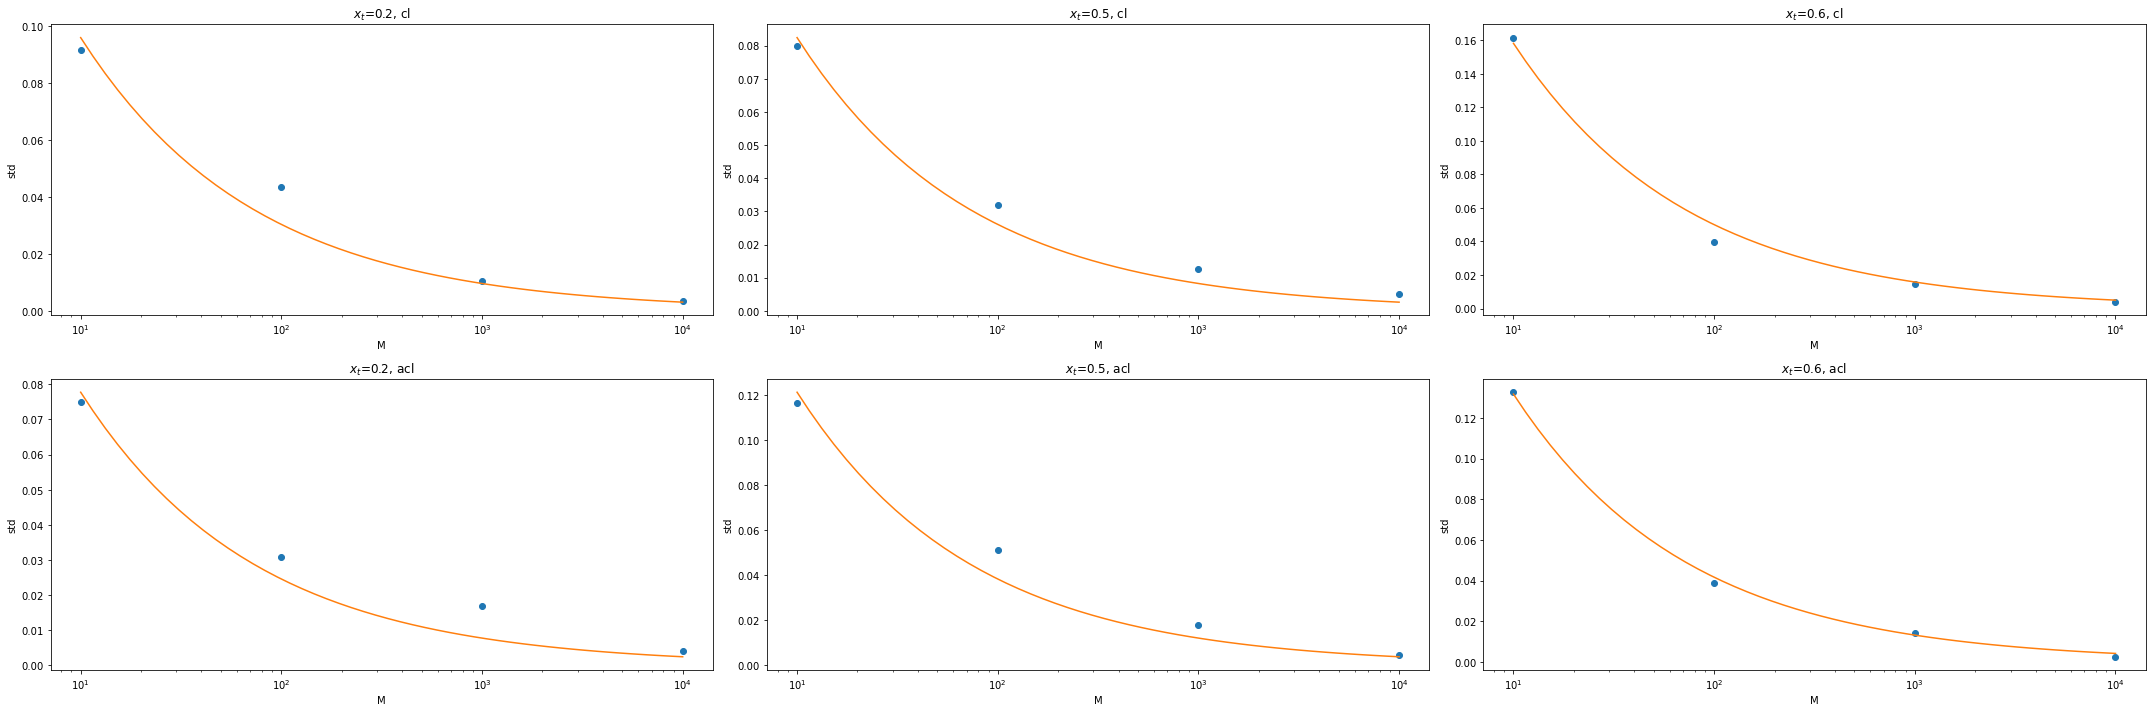

In [6]:
from scipy.optimize import curve_fit

fig, axs = plt.subplots(2,3,figsize=(30,10), tight_layout=True)

#fit function for the dependency of std on M
def fitfunc(N, a):
    return a/np.sqrt(N)

xts = [0.2,0.5,0.6]
m = [10,100,1000,10000]
for i in range(3):
    xt = xts[i]
    #create threshold classifier
    cl = create_classifier(xt, anti=False)
    std_cl = np.array([])
    
    #create threshold anti-classifier
    acl = create_classifier(xt, anti=True)
    std_acl = np.array([])
    
    for M in m:
        #compute std of error rates for both classifier and anti-classifier
        error_rates = compute_error_rates(cl, M)
        std_cl = np.append(std_cl, np.std(error_rates)) 
        
        error_rates = compute_error_rates(acl, M)
        std_acl = np.append(std_acl, np.std(error_rates)) 
    
    #plot the std over M 
    axs[0][i].plot(m, std_cl, linestyle="None", marker="o")
    axs[0][i].set_title("$x_t$="+str(xt)+", cl")
    axs[0][i].set_xlabel("M")
    axs[0][i].set_ylabel("std")
    axs[0][i].set_xscale("log")
    popt, pcov = curve_fit(fitfunc, m, std_cl)
    axs[0][i].plot(np.logspace(1,4), fitfunc(np.logspace(1,4), *popt))
    
    axs[1][i].plot(m, std_acl, linestyle="None", marker="o")        
    axs[1][i].set_title("$x_t$="+str(xt)+", acl")
    axs[1][i].set_xlabel("M")
    axs[1][i].set_ylabel("std")
    axs[1][i].set_xscale("log")
    popt, pcov = curve_fit(fitfunc, m, std_acl)
    axs[1][i].plot(np.logspace(1,4), fitfunc(np.logspace(1,4), *popt))

The std seems to be propotional to $\frac{1}{\sqrt{M}}$.

### 1.3 Baseline Cassifiers

Now we do the same steps from above but we use classifiers that ignore the features instead of the threshold (anti-)classifier.

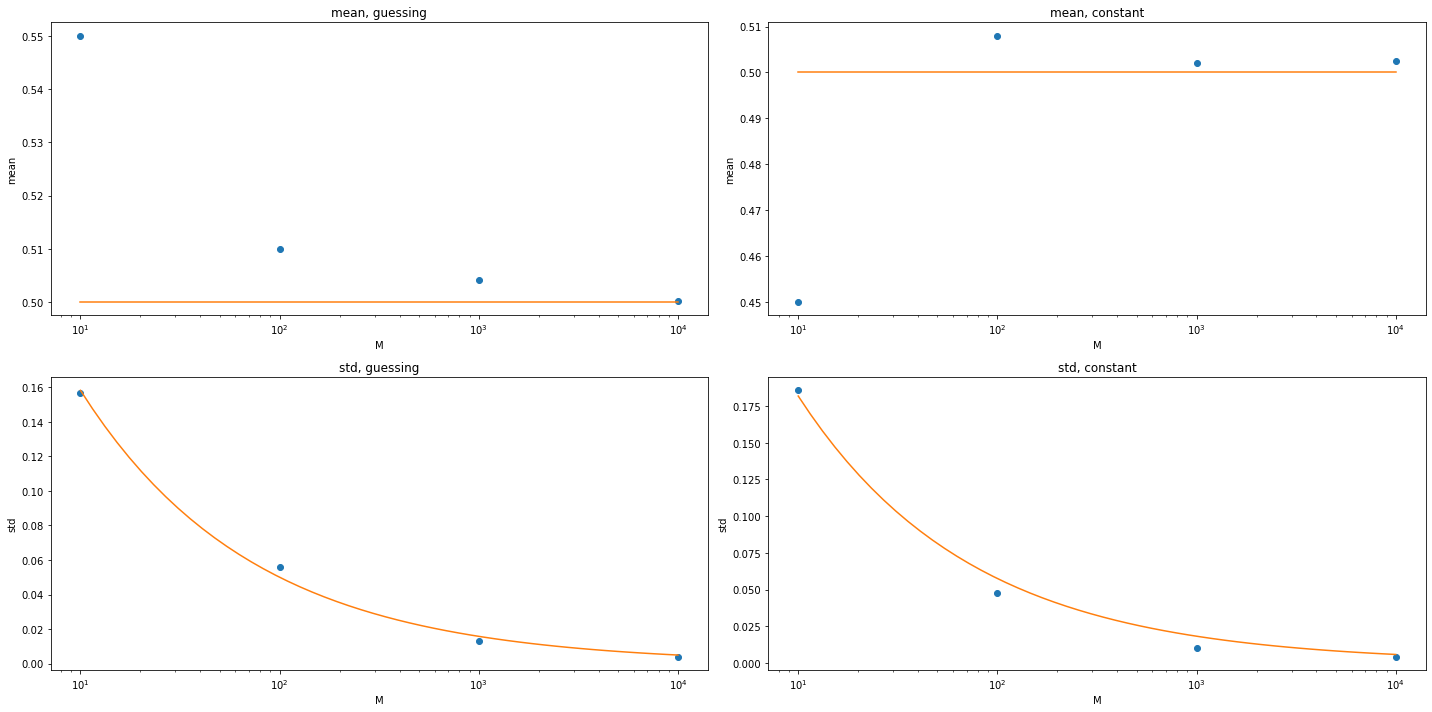

In [8]:
def guessing(X):
    return np.random.randint(0,2)

def constant(X):
    return 1

fig, axs = plt.subplots(2,2,figsize=(20,10), tight_layout=True)

mean_g = np.array([]) 
std_g = np.array([])
mean_c = np.array([])
std_c = np.array([])
for M in m:
    #compute std of error rates for both classifiers
    error_rates = compute_error_rates(guessing, M)
    mean_g = np.append(mean_g, np.mean(error_rates))
    std_g = np.append(std_g, np.std(error_rates)) 
        
    error_rates = compute_error_rates(constant, M)
    mean_c = np.append(mean_c, np.mean(error_rates))
    std_c = np.append(std_c, np.std(error_rates)) 
    
#plot errors and stds 
axs[0][0].plot(m, mean_g, linestyle="None", marker="o")
axs[0][0].set_title("mean, guessing")
axs[0][0].set_xlabel("M")
axs[0][0].set_ylabel("mean")
axs[0][0].set_xscale("log")
axs[0][0].plot([10,10000], [0.5,0.5])

axs[1][0].plot(m, std_g, linestyle="None", marker="o")        
axs[1][0].set_title("std, guessing")
axs[1][0].set_xlabel("M")
axs[1][0].set_ylabel("std")
axs[1][0].set_xscale("log")
popt, pcov = curve_fit(fitfunc, m, std_g)
axs[1][0].plot(np.logspace(1,4), fitfunc(np.logspace(1,4), *popt))

axs[0][1].plot(m, mean_c, linestyle="None", marker="o")
axs[0][1].set_title("mean, constant")
axs[0][1].set_xlabel("M")
axs[0][1].set_ylabel("mean")
axs[0][1].set_xscale("log")
axs[0][1].plot([10,10000], [0.5,0.5])

axs[1][1].plot(m, std_c, linestyle="None", marker="o")        
axs[1][1].set_title("std, constant")
axs[1][1].set_xlabel("M")
axs[1][1].set_ylabel("std")
axs[1][1].set_xscale("log")
popt, pcov = curve_fit(fitfunc, m, std_c)
axs[1][1].plot(np.logspace(1,4), fitfunc(np.logspace(1,4), *popt))

### 1.4 Nearest Neighbour Classification

In [23]:
#define nearest neighbour classifier
def create_NN(TS):
    #define classifier
    def classifier(x):
        #Training set
        repX = np.array(TS).transpose()[0]
        repY = np.array(TS).transpose()[1]
    
        #determine nearest neighbour
        i = np.argmin(np.sqrt((repX-x)**2))
        return repY[i]
    
    return classifier

#creates sample of size N=2
def create_sample():
    Xtilde = np.random.rand(2)
    return np.array([[1-np.sqrt(1-Xtilde[0]), 0],[np.sqrt(Xtilde[1]), 1]])

#compute error rate with test set size M=10000 and training set size N=2
NN = create_NN(create_sample()) #create NN-classifier
error_rate = compute_error_rates(NN, 10000, n=1)[0]
print("\nNN-Classifier:\n")
print("N=2, M=10000:")
print("error rate:", np.round(error_rate,3))

#compute average error rate with test set size M=10000 and training set size N=2 (averaged over 100 training sets) 
error_rates = np.array([])
for i in range(100):
    NN = create_NN(create_sample()) #create NN-classifier
    error_rate = compute_error_rates(NN, 10000, n=1)[0]#compute error rate
    error_rates = np.append(error_rates, error_rate)
print("N=2, M=10000, avg:")
print("mean error rate:", np.round(np.mean(error_rates),3))

#compute error rate with test set size M=10000 and training set size N=100
NN = create_NN(create_data(100))
error_rate = compute_error_rates(NN, 10000, n=1)[0]
print("N=100, 100 samples:")
print("error rate:", np.round(np.mean(error_rate),3))


NN-Classifier:

N=2, M=10000:
error rate: 0.341
N=2, M=10000, avg:
mean error rate: 0.363
N=100, 100 samples:
error rate: 0.326


We can see that the average error of the NN-classifier is approximately 35% (our result: 36.3%). For larger sizes of the training data set the error rate seems to become smaller 